<a href="https://colab.research.google.com/github/tvml/ml2122/blob/master/codici/biasvar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Visualizza andamento valori dei coefficienti in ridge regression al crescere del coefficiente di regolarizzazione

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

In [2]:
plt.style.use('fivethirtyeight')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['lines.linewidth'] = 2

colors = ['#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', '#810f7c', '#137e6d', '#be0119', '#3b638c', '#af6f09']

In [3]:
# funzione radiale gaussiana
def rbf(x,m,s):
    return np.exp(-(x-m)**2/(2*s*s))

In [4]:
# applicazione delle funzione radiali gaussiane a dataset
def Phi(x):
    res = []
    for x_ in x:
        res.append([rbf(x_[0],m,s) for m in m_rbf])
    return np.array(res)

In [5]:
# sampling di array di n valori casuali in 0-1
def sample(n):
    return np.random.uniform(0.0, 1.0, n).reshape(-1,1)

In [6]:
# numero di funzioni radiali utilizzate
n_rbf = 24

# definizione dei punti medi delle funzioni radiali mediante suddivisione del dominio
m_rbf = np.linspace(0,1,24)

# definizione della std delle funzioni radiali
s = 0.1

In [7]:
# costruzione insieme di n_ts training set, ognuno di dimensione d_ts
n_ts = 100
d_ts = 5
training_sets = [sample(d_ts) for i in range(n_ts)]

In [8]:
# insieme di valori su cui calcolare i valori target e le predizioni delle funzioni apprese
x_plot = np.arange(0,1,0.01).reshape(-1,1)

In [9]:
# definizione del coefficiente di regolazione
alpha = 10#np.exp(-10000)  

In [10]:
# definizione modello, con parametro di regolazione alpha
model=Ridge(alpha=alpha, fit_intercept=False)

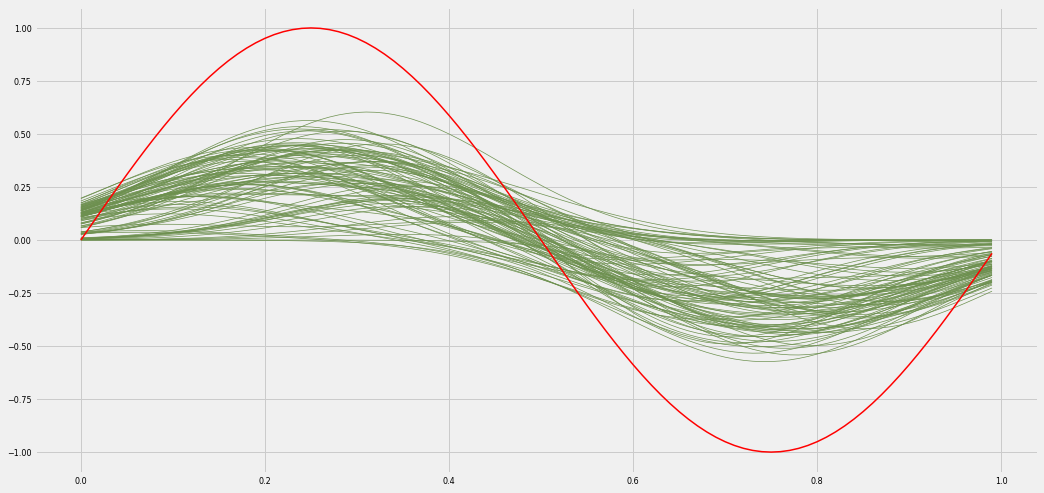

In [11]:
# per ogni traning set, apprendimento della funzione e plot sui valori di x_plot
for x in training_sets:
    # calcola valori target corrispondenti a valori in x_plot
    t=np.sin(2*np.pi*x)
    # istanzia il modello sul training set
    model.fit(Phi(x),t)
    # predice in corrispondenza ai valori in x_plot 
    y = model.predict(Phi(x_plot))
    # effettua il plot dei valori predetti
    plt.plot(x_plot, y, color=colors[3], linewidth=0.7, alpha=1)
# plot della funzione originaria
plt.plot(x_plot,np.sin(np.pi*2*x_plot).reshape(-1,1), color='r', linewidth=1.5)
plt.show()

In [12]:
# costruzione training set
X = np.random.uniform(0.0, 1.0, 25).reshape(-1,1)
t = np.sin(2*np.pi*X).ravel()

# applicazione funzioni base
phi = Phi(X)

In [16]:
X.shape

(25, 1)

In [15]:
phi.shape

(25, 24)

In [17]:
# insieme di valori del coefficiente di regolazione considerati
n_alphas = 200
alphas = np.logspace(-14, -1, n_alphas)

In [18]:
# crea modello
clf = Ridge()

In [19]:
# lista dei coefficienti appresi per i vari alpha
coefs = []

# per ogni alpha, istanzia il modello, apprende i coefficienti e li salva
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(phi, t)
    coefs.append(clf.coef_)

In [21]:
np.array(coefs).shape

(200, 24)

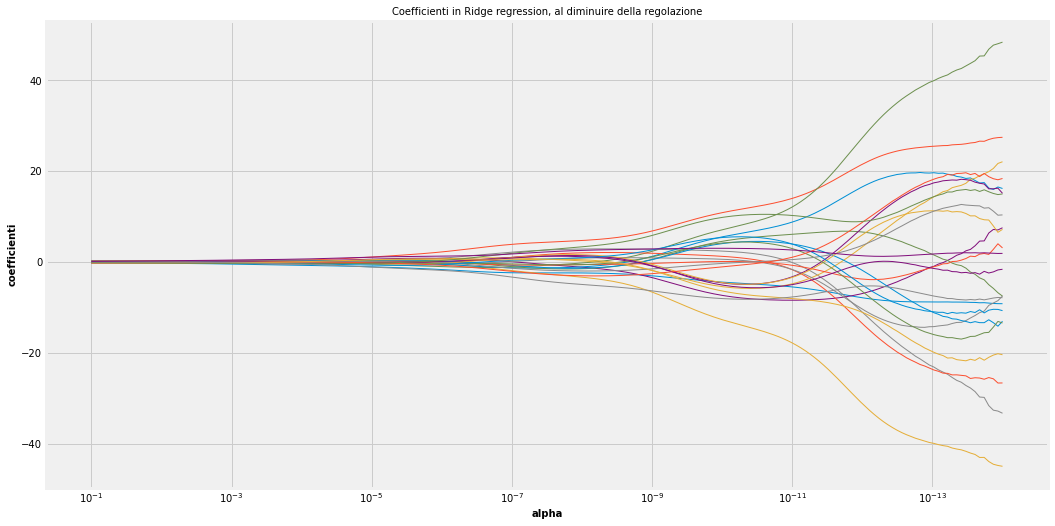

In [22]:
fig = plt.figure()
fig.patch.set_facecolor('white')
ax = fig.gca()
ax.plot(alphas, coefs, linewidth=1)
ax.set_xscale('log')
# inversione dell'asse x, da valori più grandi a valori più piccoli
ax.set_xlim(ax.get_xlim()[::-1])
plt.xlabel('alpha', fontsize=10)
plt.ylabel('coefficienti', fontsize=10)
plt.title('Coefficienti in Ridge regression, al diminuire della regolazione', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()